Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
    
Поставлена задача выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Шаг

Импортируем необходимые библиотеки

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

Прочитаем данные

In [10]:
data = pd.read_csv('/datasets/games.csv')

Посмотрим первые несколько строк данных и названия колонок

In [11]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


При первом взгляде на данные можно сказать следующее:
<li>названия столбцов можно привести к нижнему регистру
<li>можно изменить тип данных некторых столбцов (например Year_Of_Release можно привести к типу int)
<li>в данных есть пропуски, нужно будет изучить их более внимательно

# Шаг

Посмотрим как выглядят названия признаков

In [12]:
_ = [print('"{}"'.format(x)) for x in data.columns]

"Name"
"Platform"
"Year_of_Release"
"Genre"
"NA_sales"
"EU_sales"
"JP_sales"
"Other_sales"
"Critic_Score"
"User_Score"
"Rating"


Названия написаны корректно, но нужно привести их к нижнему регистру:

In [13]:
for col in data.columns.copy():
    data = data.rename(columns={col: col.lower()})

## Пропуски в данных:

Посмотрим пропуски в процентах

In [14]:
data.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

В столбце `'name'` есть пропуски, посмотрим на эти строки

In [15]:
data.query('name != name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Вероятно пропуски были получены случано либо на этапе создания базы данных либо на этапе её обработки (пропуски типа MCAR). В столбце с названием заменим пропуски на `unknown_name`

In [16]:
data['name'] = data['name'].fillna('unknown_name')

Столбец `'year_of_release'` также содержит пропуски, заменим их на среднее значение по столбцу (их не много, 1,6%)

Тип данных переведем в `'int'`

In [17]:
data['year_of_release'] = data['year_of_release'].fillna(data['year_of_release'].mean()).astype('int')

Заменим пропуски в столбце `'genre'` на `'unknown_genre'`

In [18]:
data['genre'] = data['genre'].fillna('unknown_genre')

Изучим данные столбца `'user_score'`:

In [19]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

## tbd - значения

Как видно, в столбце есть баллы рейтинга пользователей от 0 до 10 в формате `str`, а также есть пропуски Nan и какие -то значения `'tbd'`. Yandex говорит нам что `tbd` - это аббривеатура `"To Be Determined"`(будет определено). Посмотрим сколько всего пропусков и значений `tbd`: </big>

In [20]:
count_tbd = data.query('user_score == "tbd"')['user_score'].count()
count_nan = data['user_score'].isna().sum()
print('Количество tbd = {}, количество Nan = {}. Всего = {}. Всего строк: {}'.
      format(count_tbd, count_nan, count_tbd+count_nan, data['user_score'].count()))

Количество tbd = 2424, количество Nan = 6701. Всего = 9125. Всего строк: 10014


Таким образом, в совокупности во всем столбце неизвестны около 91% данных. Удалить их значит удалить всю таблицу, а заменить на среднее или медиану тоже не выход, поскольку данных слишком мало, чтобы среднее адекватно отражало их суть. Заменим `'tbd'` на nan и изменим тип данных столбца на `float`, чтобы их можно было обработать как числовые значения в дальнейших расчетах

In [21]:
data['user_score'] = data['user_score'].replace('tbd', np.nan).astype('float')

Исследуем столбец `'critic_score'`:

In [22]:
print(data['critic_score'].sort_values().unique())
data['critic_score'].isna().sum()

[13. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. nan]


8578

Пропусков слишком много, оставим их без изменнеий

## Суммарные продажи во всех регионах в отдельный столбец

Посчитаем суммарные продажи по всем регионам и сохраним их в отдельный столбец 'all_sales'. Для этого создадим функцию и применем ее к каждой строке (функция одной строки):

In [23]:
def all_sales(row):
    return row['na_sales'] + row['eu_sales'] + row['jp_sales']

data['all_sales'] = data.apply(all_sales, axis=1)

# Шаг

Количество выпущенных игр по годам</h2>

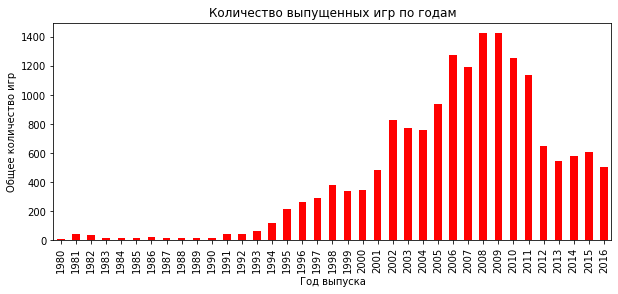

In [24]:
data.groupby('year_of_release')['name'].count().plot.bar(rot=90, figsize=(10,4), color='red')
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Общее количество игр')
plt.show()

Максимально часто игры выпускались с 1991 года по 2016 год. Оставим этот период для дальнейших расчетов

In [25]:
data_actual = data.query('year_of_release >= 1991')

##  Изменение продаж во времени в зависимости от вида платформы

Возьмем ТОП-20 платформ по совокупным продажам:

Самые популярные платформы: PS2 X360 Wii PS3 DS PS GBA PS4 PSP XB 3DS PC N64 GC GB SNES XOne WiiU PSV SAT


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-pack

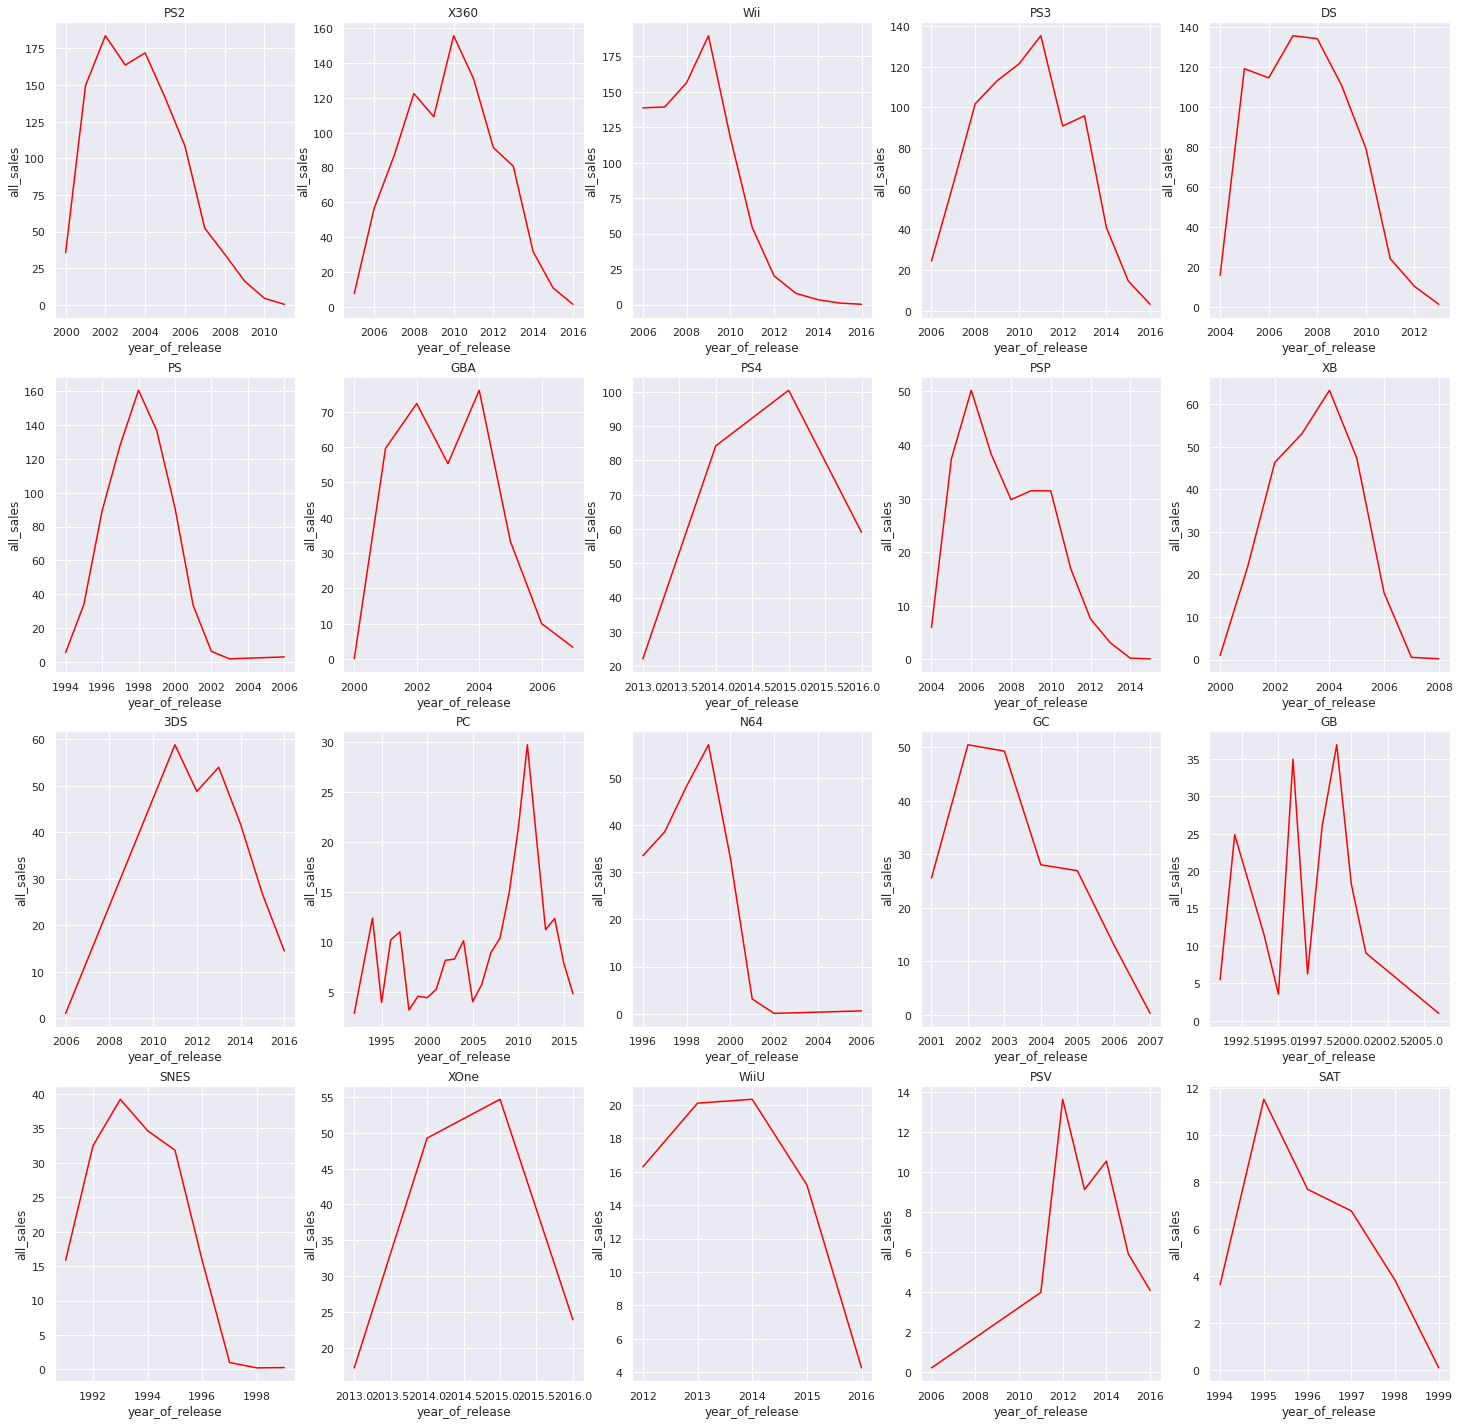

In [26]:
top20 = data_actual.pivot_table(index=['platform'], 
                                values='all_sales', 
                                aggfunc='sum').sort_values(by='all_sales', 
                                                           ascending=False).reset_index().head(20)

print('Самые популярные платформы:', *list(top20['platform']))

sns.set(rc={'figure.figsize':(25,25)})
for i, v in enumerate(top20['platform']):
    t = data_actual.query('platform == @v').groupby('year_of_release')['all_sales'].sum().reset_index()
    plt.subplot(4,5,i+1)
    sns.lineplot(t['year_of_release'], t['all_sales'], color='red')
    plt.title(v)
plt.show()

### Вывод:
* Как видно из графиков, в среднем "срок жизни" платформы (динамика продаж) составляет около 6-8 лет. Из перспективных платформ можно выделить: 
* PS4 (но продажи снижаются, хотя вероятно еще года 3 они будут на высоком уровне)  
* 3DS (еще некоторое время может давать относительно высокие продажи) 
* XOne (приблизительно аналогичная ситуация как и у предыдущей платформы)
* PSV (продажи начали рости в 2011 году, вероятно 6 лет до 2017 они должны оставаться высокими)</big>

## Построим  график «ящик с усами» по глобальным продажам игр в разбивке по этим платформам

In [27]:
data_actual2 = data_actual.query('platform == "PS4" | platform == "3DS" | platform == "XOne" | platform == "PSV"')

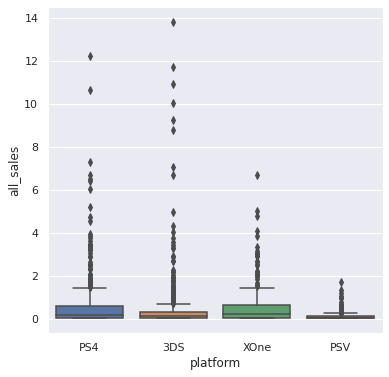

In [28]:
sns.set(rc={'figure.figsize':(6,6)})
sns.boxplot(x=data_actual2['platform'], y=data_actual2['all_sales'], data=data_actual2)
plt.show()

### Вывод

    Из графика "ящик с усами" видно что в среднем совокупные продажи  75% игр на платформах PS4 и XOne не  превышают 1,5 млн игр в год, а 75% игр на платформах 3DS и PSV не более 1 млн игр в год. При этом существуют игры, которые показали очень значительные продажи: у PS4 и 3DS есть игры совокупные продажи которых составили более 12 млн игр в год, у ХOne есть игра, продажи которой составили более 6 млн/год, а у PSV все продажи игр не превысили 2 млн штук в год</big>

## Посмотрим, есть ли корреляция между продажами популярной игры и отзывами критиков или пользователей:


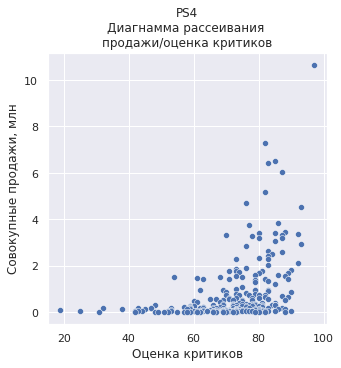

Корреляция продаж с оценкой критиков: 0.4059


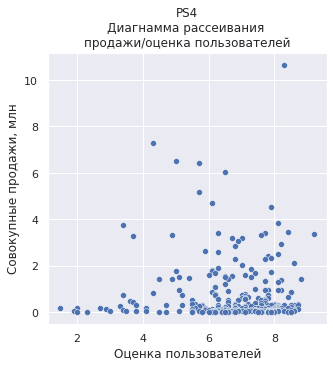

Корреляция продаж с оценкой пользователей: -0.03126


In [29]:
sns.set(rc={'figure.figsize':(5, 5)})
t = data.query('platform == "PS4"')
sns.scatterplot(y=t['all_sales'], 
                x=t['critic_score']
                ).set_title('PS4\nДиагнамма рассеивания \nпродажи/оценка критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Совокупные продажи, млн')
plt.show()
print('Корреляция продаж с оценкой критиков: {:.4}'.format(t['all_sales'].corr(t['critic_score'])))

sns.scatterplot(y=t['all_sales'], 
                x=t['user_score'] 
                ).set_title('PS4\nДиагнамма рассеивания \nпродажи/оценка пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Совокупные продажи, млн')
plt.show()
print('Корреляция продаж с оценкой пользователей: {:.4}'.format(t['all_sales'].corr(t['user_score'])))

### ВЫВОД:
    
Есть слабая корреляция между оценкой критиков и количеством продаж, а вот между оценкой пользователей и количеством продаж никакой значимой корреляции нет </big>

Проверим остальные платформы:


Wii


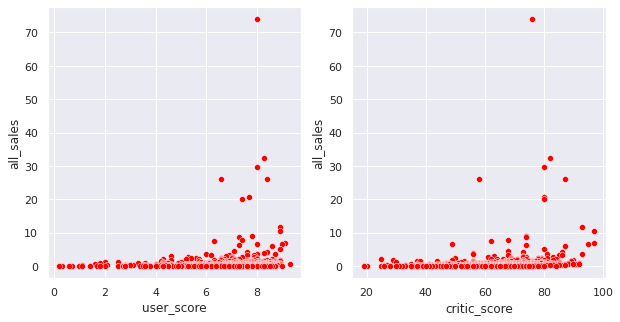

Wii: корреляция кол-ва продаж с отзывами пользователей :0.11332722536037962
Вывод: слабая корреляция
Wii: корреляция кол-ва продаж с отзывами критиков      :0.17911807418535206
Вывод: слабая корреляция

DS


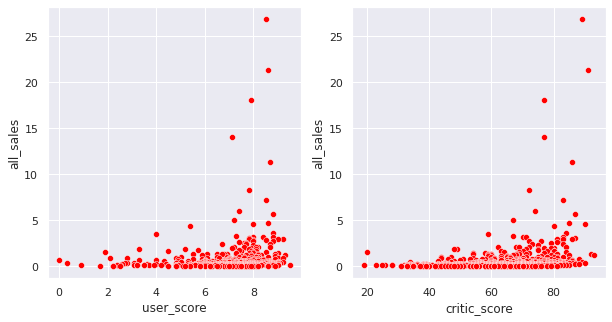

DS: корреляция кол-ва продаж с отзывами пользователей :0.13259666975439183
Вывод: слабая корреляция
DS: корреляция кол-ва продаж с отзывами критиков      :0.238988720250648
Вывод: слабая корреляция

X360


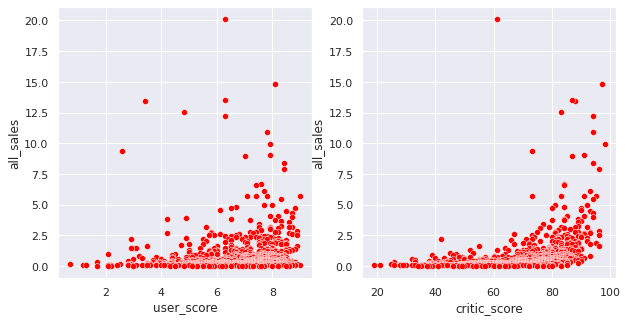

X360: корреляция кол-ва продаж с отзывами пользователей :0.11356837404612276
Вывод: слабая корреляция
X360: корреляция кол-ва продаж с отзывами критиков      :0.3926054580225936
Вывод: слабая корреляция

PS3


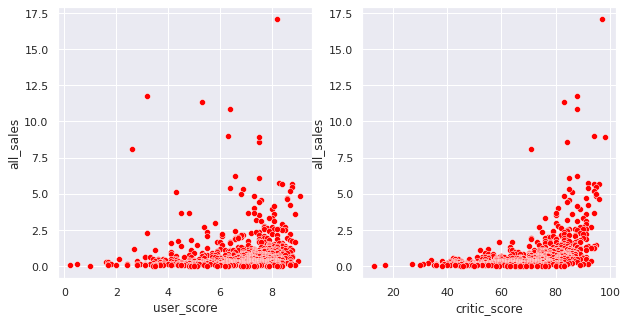

PS3: корреляция кол-ва продаж с отзывами пользователей :0.1292590545961392
Вывод: слабая корреляция
PS3: корреляция кол-ва продаж с отзывами критиков      :0.43733150074954924
Вывод: слабая корреляция

PS2


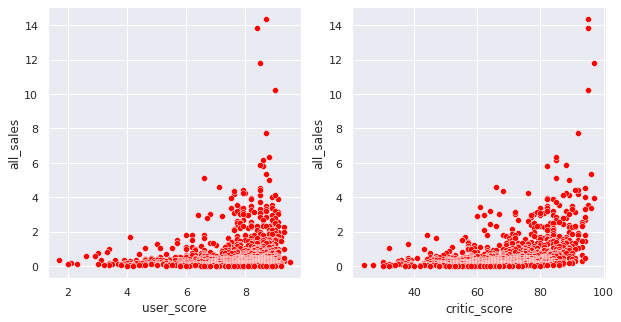

PS2: корреляция кол-ва продаж с отзывами пользователей :0.1854100487834121
Вывод: слабая корреляция
PS2: корреляция кол-ва продаж с отзывами критиков      :0.4081287853659154
Вывод: слабая корреляция

GBA


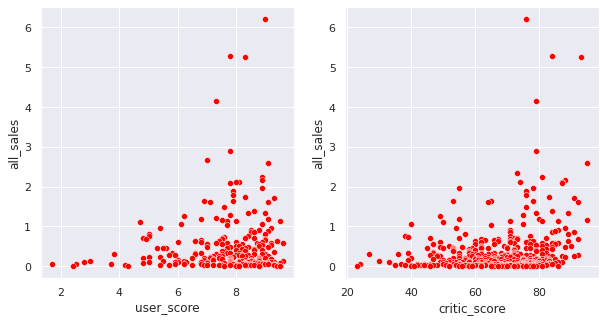

GBA: корреляция кол-ва продаж с отзывами пользователей :0.09956018134119385
Вывод: нет корреляции
GBA: корреляция кол-ва продаж с отзывами критиков      :0.2382487098351915
Вывод: слабая корреляция

PS4


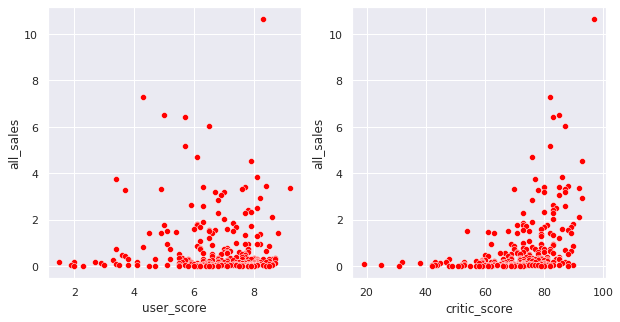

PS4: корреляция кол-ва продаж с отзывами пользователей :-0.03126053686666918
Вывод: нет корреляции
PS4: корреляция кол-ва продаж с отзывами критиков      :0.40588677465201267
Вывод: слабая корреляция

3DS


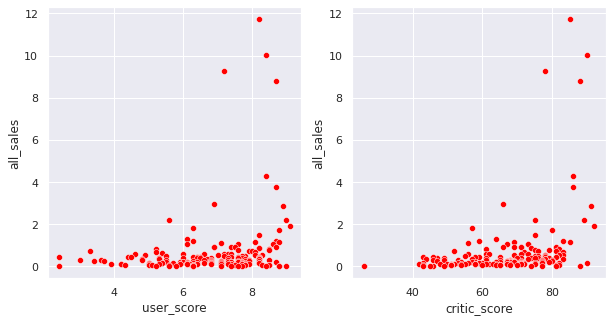

3DS: корреляция кол-ва продаж с отзывами пользователей :0.22705554104025097
Вывод: слабая корреляция
3DS: корреляция кол-ва продаж с отзывами критиков      :0.3506217069195197
Вывод: слабая корреляция

PS


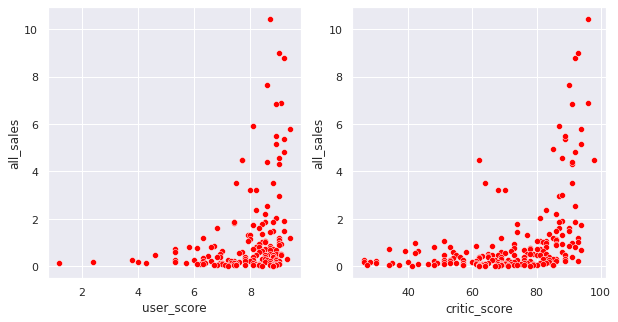

PS: корреляция кол-ва продаж с отзывами пользователей :0.2971529330486675
Вывод: слабая корреляция
PS: корреляция кол-ва продаж с отзывами критиков      :0.44634238930586123
Вывод: слабая корреляция

XB


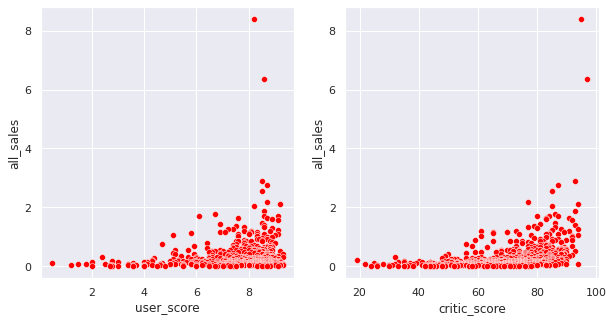

XB: корреляция кол-ва продаж с отзывами пользователей :0.17972349122834408
Вывод: слабая корреляция
XB: корреляция кол-ва продаж с отзывами критиков      :0.37990855237269633
Вывод: слабая корреляция

PC


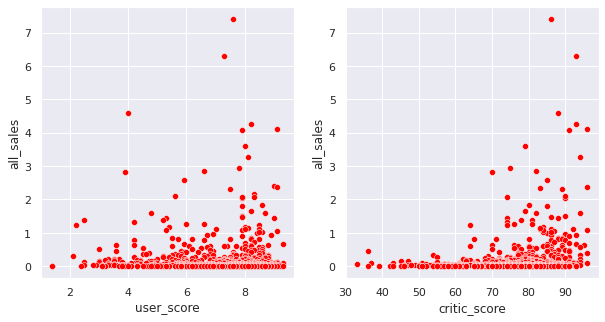

PC: корреляция кол-ва продаж с отзывами пользователей :0.01276937143319068
Вывод: нет корреляции
PC: корреляция кол-ва продаж с отзывами критиков      :0.24991532780063905
Вывод: слабая корреляция

PSP


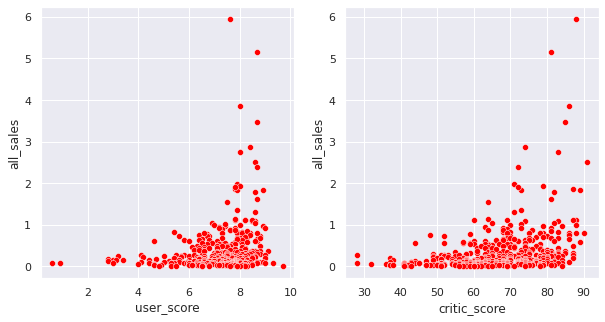

PSP: корреляция кол-ва продаж с отзывами пользователей :0.22969412195498282
Вывод: слабая корреляция
PSP: корреляция кол-ва продаж с отзывами критиков      :0.3220553422870039
Вывод: слабая корреляция

XOne


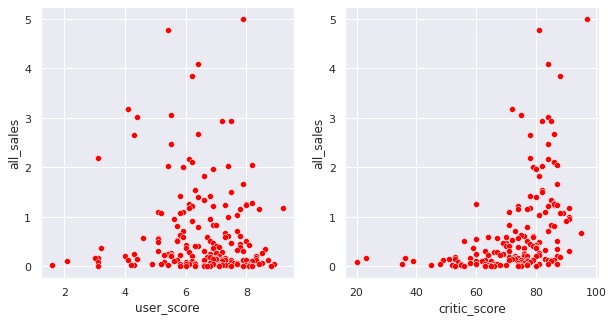

XOne: корреляция кол-ва продаж с отзывами пользователей :-0.06880394425598693
Вывод: нет корреляции
XOne: корреляция кол-ва продаж с отзывами критиков      :0.41720638309101765
Вывод: слабая корреляция

WiiU


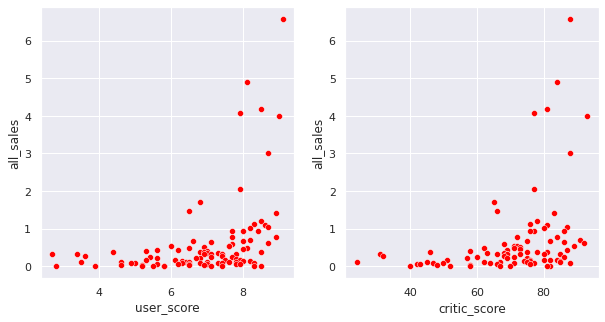

WiiU: корреляция кол-ва продаж с отзывами пользователей :0.3992109927499889
Вывод: слабая корреляция
WiiU: корреляция кол-ва продаж с отзывами критиков      :0.34706169744855475
Вывод: слабая корреляция

GC


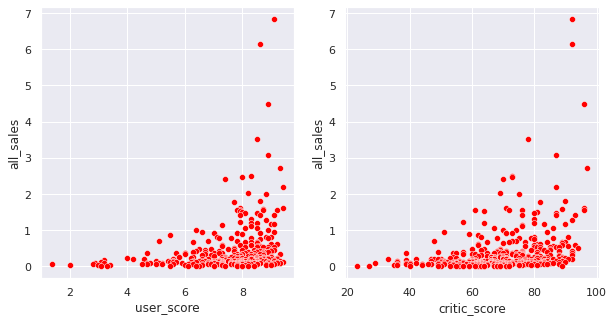

GC: корреляция кол-ва продаж с отзывами пользователей :0.23436319539230535
Вывод: слабая корреляция
GC: корреляция кол-ва продаж с отзывами критиков      :0.3254763908357058
Вывод: слабая корреляция

DC


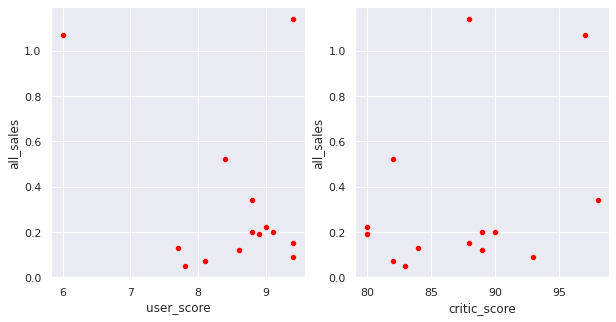

DC: корреляция кол-ва продаж с отзывами пользователей :-0.30862061072014446
Вывод: нет корреляции
DC: корреляция кол-ва продаж с отзывами критиков      :0.3523467781617163
Вывод: слабая корреляция

PSV


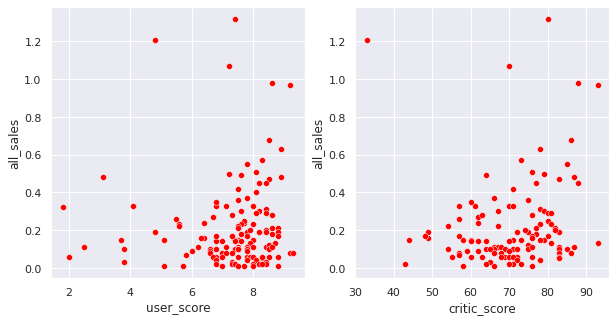

PSV: корреляция кол-ва продаж с отзывами пользователей :0.03344379355093453
Вывод: нет корреляции
PSV: корреляция кол-ва продаж с отзывами критиков      :0.14024245601474147
Вывод: слабая корреляция


In [30]:
sns.set(rc={'figure.figsize':(10, 5)})

for v in data_actual['platform'].unique():
    t = data_actual.query('platform == @v')   
    if t['all_sales'].corr(t['critic_score']) != t['all_sales'].corr(t['critic_score']):
        continue
    print()
    print(v)
    plt.subplot(1,2,1)
    sns.scatterplot(data=t, x='user_score', y='all_sales', color='red')
    
    plt.subplot(1,2,2)
    sns.scatterplot(data=t, x='critic_score', y='all_sales', color='red')
    
    plt.show()
    print('{}: корреляция кол-ва продаж с отзывами пользователей :{}'.format(v, t['all_sales'].corr(t['user_score'])))
    if t['all_sales'].corr(t['user_score']) > 0.7:
        print('Вывод: сильная корреляция')
    elif t['all_sales'].corr(t['user_score']) < 0.1:
        print('Вывод: нет корреляции')
    else:
        print('Вывод: слабая корреляция')
    print('{}: корреляция кол-ва продаж с отзывами критиков      :{}'.format(v, t['all_sales'].corr(t['critic_score'])))   
    if t['all_sales'].corr(t['critic_score']) > 0.7:
        print('Вывод: сильная корреляция')
    elif t['all_sales'].corr(t['critic_score']) < 0.1:
        print('Вывод: нет корреляции')
    else:
        print('Вывод: слабая корреляция')

### ВЫВОД:

Количество продаж по платформам больше кореллирует с отзывами критиков, нежели с отзывами пользователей в целом. Ко мнению критиков можно прислушиваться


Посмотрим как распределяются игры по жанрам (количество игр и продажи):

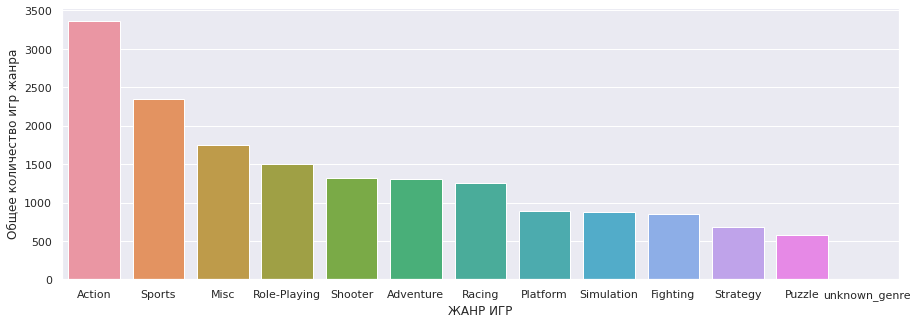

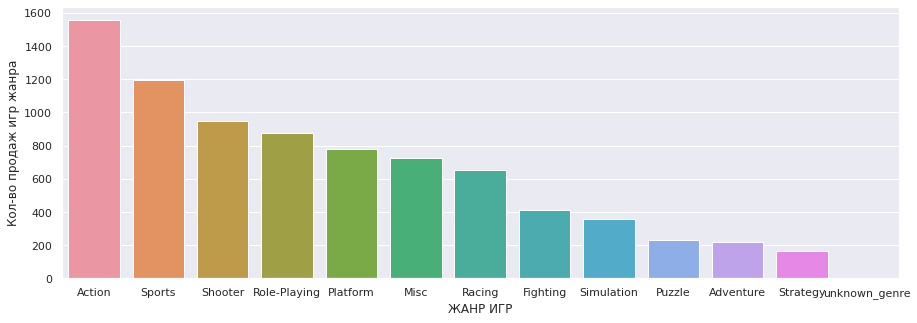

In [31]:
genre_data = data.pivot_table(index='genre', values='all_sales', aggfunc=('count', 'sum')).reset_index()
sns.set(rc={'figure.figsize':(15, 5)})

sns.barplot(data=genre_data.sort_values(by='count', ascending=False), 
            x='genre', 
            y='count').set(xlabel='ЖАНР ИГР', ylabel='Общее количество игр жанра')
plt.show()

sns.barplot(data=genre_data.sort_values(by='sum', ascending=False), 
            x='genre', 
            y='sum').set(xlabel='ЖАНР ИГР', ylabel='Кол-во продаж игр жанра')
plt.show()

### ВЫВОД:

На рынке больше представлены игры жанров Action, Sports, Misc, Role-Playing, Shooter. Менее популярные жанры это: Puzzle, Strategy, Fighting, Simulation.

А по количеству продаж жанры расположились в порядке убывания: Action, Sports, Shooter, Role_playing, Platform.
    
Прибыльнее всего вкладываться в жанры Action и Sports.

# Шаг

Составим портрет пользователя каждого региона: NA, EU, JP

Найдем самые популярные платформы. Для этого сначала найдем игры каких платформ в среднем продаются больше.

In [32]:
na = data.pivot_table(index='platform', values='na_sales', aggfunc=('sum', 'mean')).reset_index().sort_values(by='mean', ascending=False).reset_index(drop=True)
eu = data.pivot_table(index='platform', values='eu_sales', aggfunc=('sum', 'mean')).reset_index().sort_values(by='mean', ascending=False).reset_index(drop=True)
jp = data.pivot_table(index='platform', values='jp_sales', aggfunc=('sum', 'mean')).reset_index().sort_values(by='mean', ascending=False).reset_index(drop=True)

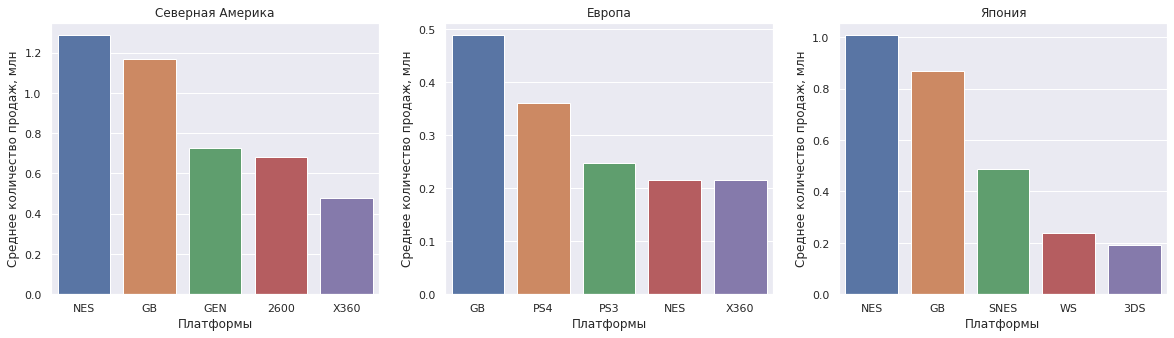

In [33]:
sns.set(rc={'figure.figsize':(20, 5)})
plt.subplot(1,3,1)
sns.barplot(data=na.head(), x='platform', y='mean').set(xlabel='Платформы', ylabel='Среднее количество продаж, млн', title='Северная Америка')
plt.subplot(1,3,2)
sns.barplot(data=eu.head(), x='platform', y='mean').set(xlabel='Платформы', ylabel='Среднее количество продаж, млн', title='Европа')
plt.subplot(1,3,3)
sns.barplot(data=jp.head(), x='platform', y='mean').set(xlabel='Платформы', ylabel='Среднее количество продаж, млн', title='Япония')
plt.show()

### Вывод

Если сравнить по среднему количеству продаж, то мы получим следующие данные:
        <li>В Северной Америке больше спрос на игры на базе: NES, GB, GEN, 2600, x360 платформ</li>
        <li>В Европе больше любят играть на GB, PS4, PS3, NES, X360</li>
        <li>В Японии на: NES, GB, SNES, WS, 3DS</li>


Посмотрим различия по долям продаж

In [34]:
var_na_sum = data['na_sales'].sum()
var_eu_sum = data['eu_sales'].sum()
var_jp_sum = data['jp_sales'].sum()

na['share'] = na['sum'] / var_na_sum
eu['share'] = eu['sum'] / var_eu_sum
jp['share'] = jp['sum'] / var_eu_sum

na = na.sort_values(by='share', ascending=False).reset_index(drop=True)
eu = eu.sort_values(by='share', ascending=False).reset_index(drop=True)
jp = jp.sort_values(by='share', ascending=False).reset_index(drop=True)

Северная Америка
Доля на продаж платформы X360  = 13.7%
Доля на продаж платформы  PS2  = 13.3%
Доля на продаж платформы  Wii  = 11.3%
Доля на продаж платформы  PS3  = 8.9%
Доля на продаж платформы  DS   = 8.7%


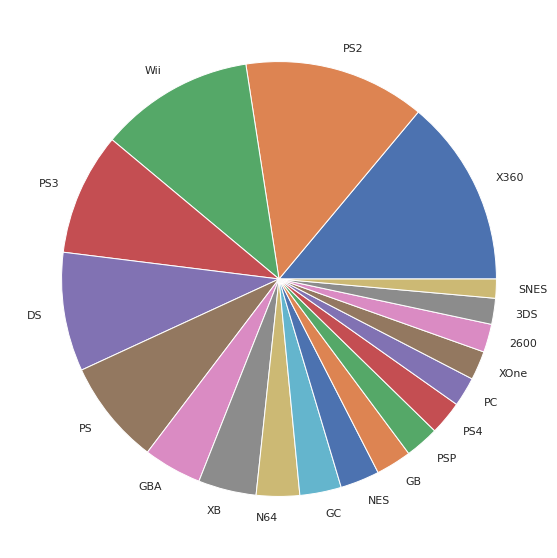

Европа
Доля на продаж платформы  PS2  = 14.0%
Доля на продаж платформы  PS3  = 13.6%
Доля на продаж платформы X360  = 11.2%
Доля на продаж платформы  Wii  = 10.8%
Доля на продаж платформы  PS   = 8.8%


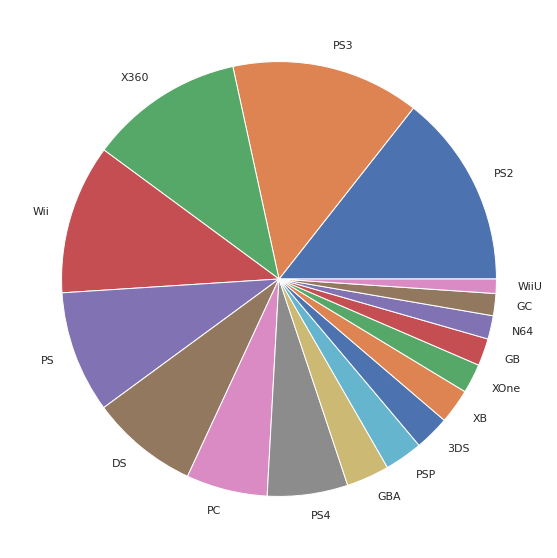

Япония
Доля на продаж платформы  DS   = 7.2%
Доля на продаж платформы  PS   = 5.8%
Доля на продаж платформы  PS2  = 5.7%
Доля на продаж платформы SNES  = 4.8%
Доля на продаж платформы  3DS  = 4.2%


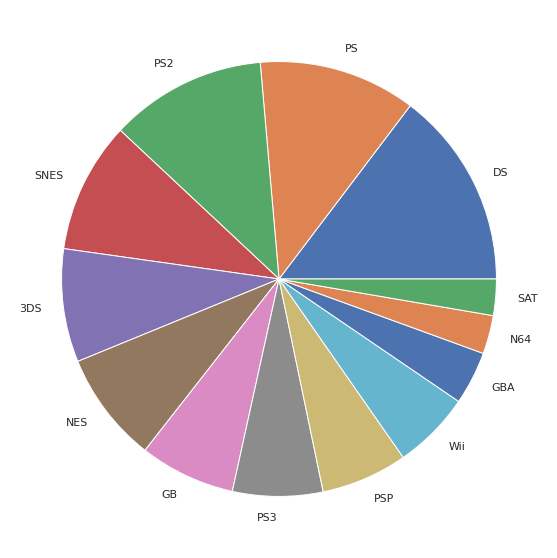

In [35]:
sns.set(rc={'figure.figsize':(10, 10)})
# убирём платформы с сверхнизкими долями в продажах, чтобы они не отображалиьс на графике
na = na.query('share > 0.01')
eu = eu.query('share > 0.01')
jp = jp.query('share > 0.01')

plt.pie(na['share']*100, labels=na['platform'])
print('Северная Америка')
for i, platform in enumerate(na['platform'].head()):
    print('Доля на продаж платформы {:^5} = {:.1%}'.format(platform, na.loc[i, 'share']))
plt.show()
plt.pie(eu['share']*100, labels=eu['platform'])
print('Европа')
for i, platform in enumerate(eu['platform'].head()):
    print('Доля на продаж платформы {:^5} = {:.1%}'.format(platform, eu.loc[i, 'share']))
plt.show()
plt.pie(jp['share']*100, labels=jp['platform'])
print('Япония')
for i, platform in enumerate(jp['platform'].head()):
    print('Доля на продаж платформы {:^5} = {:.1%}'.format(platform, jp.loc[i, 'share']))
plt.show()
    

### Вывод

Если сравнивать по долям продаж, то картинка меняется:
   * В Северной Америке доля продаваемых игр по платформам (по убиванию): X360, PS2, Wii, PS3, DS
   * В Европе продаются те же игр приставки, что и в Америке но в другом соотношении (по убыванию): PS2, PS3, X360, Wii, PS
   * В Японии любят играть на других платформах и спросом пользуются: DS, PS, PS2, SNES, 3DS

## Cамые распространенные игровые жанры:

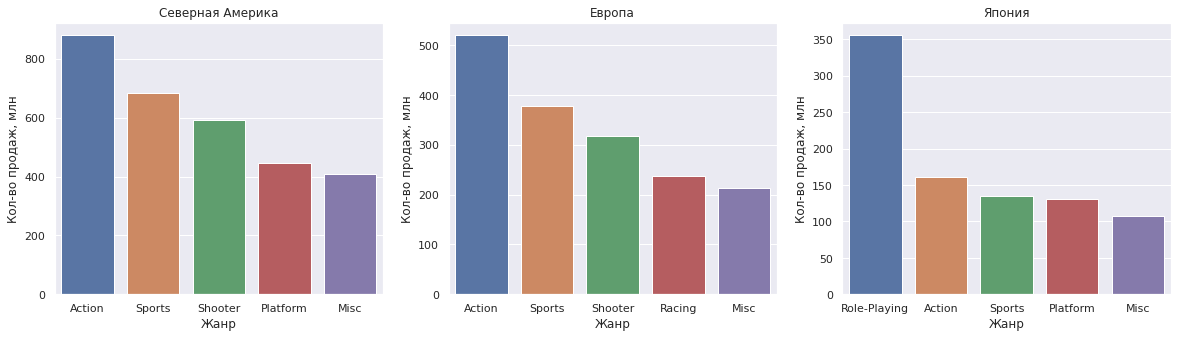

In [36]:
sns.set(rc={'figure.figsize':(20, 5)})
plt.subplot(1,3,1)
na_genre = data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index().head()
sns.barplot(data=na_genre, x='genre', y='na_sales').set(title='Северная Америка', xlabel='Жанр', ylabel='Кол-во продаж, млн')
plt.subplot(1,3,2)
eu_genre = data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index().head()
sns.barplot(data=eu_genre, x='genre', y='eu_sales').set(title='Европа', xlabel='Жанр', ylabel='Кол-во продаж, млн')
plt.subplot(1,3,3)
jp_genre = data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index().head()
sns.barplot(data=jp_genre, x='genre', y='jp_sales').set(title='Япония', xlabel='Жанр', ylabel='Кол-во продаж, млн')
plt.show()

### Вывод


Во всех 3х частях света в топ-5 входят жанры Action, Sports, Misc. Shooter в Северной Америке и Европе занимает 3 место, а вот в Японии не входит в топ-5. Platform на 4 месте в Северной Америке и в Японии, но не вошел в Европейских странах в топ-5 (там на его месте Racing). И в Японии на первом месте стоят Role-Playing

## Влияние рейтинга ESRB на продажи в регионах

C помощью функции создадим столбец с переводом значений рейтинга в числовые значения. Затем создадим barplot с рейтингом и величиной продаж по 3м регионам.

In [37]:
def rating_esrb_age(r):
    if r == 'EC':
        return 3
    elif (r == 'E') or (r == 'K-A'):
        return 6
    elif r == 'E10+':
        return 10
    elif r == 'T':
        return 13
    elif r == 'M':
        return 17
    elif r == 'AO':
        return 18
    else:
        return np.nan
data['rating_esrb_age'] = data['rating'].apply(rating_esrb_age)
esrb_na = data.pivot_table(index='rating_esrb_age', values='na_sales', aggfunc='sum').reset_index()
esrb_eu = data.pivot_table(index='rating_esrb_age', values='eu_sales', aggfunc='sum').reset_index()
esrb_jp = data.pivot_table(index='rating_esrb_age', values='jp_sales', aggfunc='sum').reset_index()


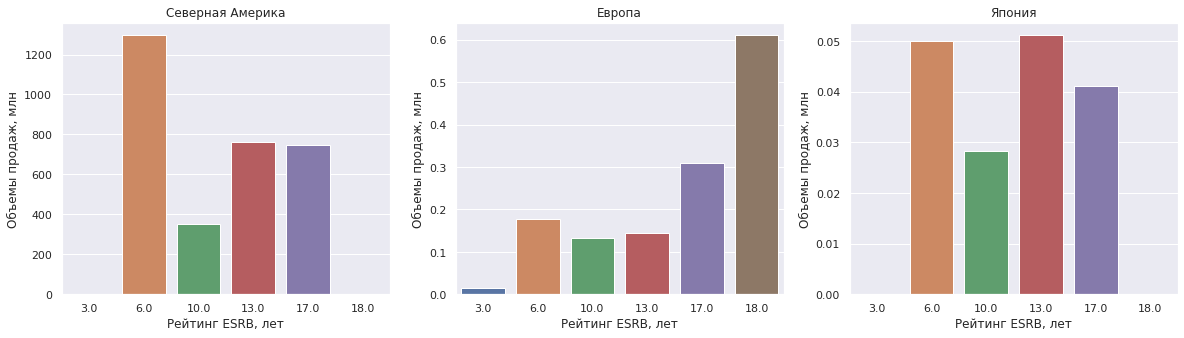

In [38]:
sns.set(rc={'figure.figsize':(20, 5)})
t = data.query('rating_esrb_age == rating_esrb_age')
plt.subplot(1,3,1)
sns.barplot(data=esrb_na, 
                x='rating_esrb_age', 
                y='na_sales',
                ci=None
                ).set(title='Северная Америка', xlabel='Рейтинг ESRB, лет', ylabel='Объемы продаж, млн')
plt.subplot(1,3,2)
sns.barplot(data=data, 
                x='rating_esrb_age', 
                y='eu_sales',
                ci=None
                ).set(title='Европа', xlabel='Рейтинг ESRB, лет', ylabel='Объемы продаж, млн')
plt.subplot(1,3,3)
sns.barplot(data=data, 
                x='rating_esrb_age', 
                y='jp_sales',
                ci=None
                ).set(title='Япония', xlabel='Рейтинг ESRB, лет', ylabel='Объемы продаж, млн')
plt.show()

### Вывод


Из диаграмм видно, что в Северной Америке большим спросом пользуются игры для детей от 6 лет; в Европе большем спросом ползуются игры с допуском от 18 лет; В Японии продажи по рейтингу ESRB от 6 до 17 лет распределились практически равномерно. Есть наблюдение, что игры с рейтингом от 3 лет и от 18 лет в Северной Америке и в Японии продаются крайне плохо

# Шаг

Проверим: одинаковые  ли средние пользовательские рейтинги платформ Xbox One и PC

H0: средний пользовательский рейтинг Xbox One == среднему пользовательскому рейтингу PC

In [39]:
alpha = .05
xbox = data.query('platform == "XOne" & user_score == user_score')['user_score']
pc = data.query('platform == "PC" & user_score == user_score')['user_score']
# print(pc)
dif_rating = st.ttest_ind(xbox, pc)
print('р-значение = {:.2}\n'.format(dif_rating.pvalue))
if dif_rating.pvalue >= alpha:
    print('Мы не можем отвергнуть нулевую гипотезу, нет статистического различия')
else:
    print('Статистическое различие существенно, отвергаем нулевую гипотезу: ')
    print('cредний пользовательский рейтинг Xbox One НЕ РАВЕН среднему пользовательскому рейтингу РС')

р-значение = 1.4e-05

Статистическое различие существенно, отвергаем нулевую гипотезу: 
cредний пользовательский рейтинг Xbox One НЕ РАВЕН среднему пользовательскому рейтингу РС


## Проверим: одинаковые  ли средние пользовательские рейтинги жанров Action и Sports

H0: средний пользовательский рейтинг жанра Action == среднему пользовательскому рейтингу жанра Sports

In [40]:
alpha = .05
action = data.query('genre == "Action" & user_score == user_score')['user_score']
sports = data.query('genre == "Sports" & user_score == user_score')['user_score']
# print(pc)
dif_rating = st.ttest_ind(action, sports)
print('р-значение = {:.2}\n'.format(dif_rating.pvalue))
if dif_rating.pvalue >= alpha:
    print('Мы не можем отвергнуть нулевую гипотезу, нет статистического различия')
else:
    print('Статистическое различие существенно, отвергаем нулевую гипотезу: ')
    print('cредний пользовательский рейтинг жанра Action == среднему пользовательскому рейтингу жанра Sports')

р-значение = 0.1

Мы не можем отвергнуть нулевую гипотезу, нет статистического различия


## Пояснения:

Мы приняли нулевые гипотезы как равенства двух выборок исходя из утверждения ЦПТ: средние значения выборок, относящихся к одной генеральной совокупности, распределяются нормально вокруг среднего генеральной совокупности. При этом подавляющее (статистически значимое) большинство всех выборочных средних не будет превышать '100% - alpha' рубежа (я задал alpha как 5%). Таким образом, если наше р-значение меньше альфа, значит выборочные средние сравниваемых выборок (вероятнее всего! статистически) относятся к разным генеральным совокупностям, а потому исходное условие (нулевая гипотеза) не верно.


# ОБЩИЙ ВЫВОД
  *  Средний срок активного спроса на платформу от 6 до 8 лет (когда продажи максимальные)
  *  Отзывы критиков больше коррелируют с объемами продаж игр, нежели отзывы пользователей
  *  Самые популярные жанры - это Action, Sports, Misc, Shooter, Platform, Role-Playing, Racing. Причем в разных регионал популярность среди этих жанров меняется.
  *  Рейтинг ESRB в разных регионах оказывает разное влияние на продажи, так с рейтингом от 3 и от 18 лет в Северной Америке и Японии игры продаются крайне плохо, при этом в Европе наоборот игры с рейтингом 18+ самые популярные.
  *  Средние пользовательские рейтинги статистически различаются между определенными приставками (Xbox One and PC), а средние пользовательские рейтинги внутри жанров могут статистически различаться (Action и Sports).